<a href="https://colab.research.google.com/github/alicewu1/healthcare-visuals/blob/main/visualization_covid19_georgia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AHI Microcourse Visualization for HHA507 Assignment 5**
Dataset retreived from: https://covid-hub.gio.georgia.gov/datasets/georgia-covid-19-case-data/explore
---


# Step 1: Loading in Packages

In [65]:
# the below packages are related to loading and performing basic
# transformations of the data

import pandas as pd
import numpy as np

print('cell successfully ran')

cell successfully ran


In [66]:
# now we are going to load in some visualization packages to help create
# visuals of the data

import seaborn as sns
import matplotlib 
import plotly.express as px

sns.set_theme(style="whitegrid") # set_theme sets multiple theme parameters in one step
print('cell successfully ran')

cell successfully ran


# Loading in Data

In [67]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/hantswilliams/AHI_Microcourse_Visualization/main/Data/Georgia_COVID/Georgia_COVID-19_Case_Data.csv")

In [68]:
dataframe

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,C_His,C_NonHis,C_EthUnk,GlobalID,C_NEW_PERCT_CHG,D_NEW_PERCT_CHG,C_NEW_7D_MEAN,D_NEW_7D_MEAN,C_NEW_7D_PERCT_CHG,D_NEW_7D_PERCT_CHG
0,1,BALDWIN,1003,2021/04/13 03:59:59+00,4,3795,0,115,0,318,...,106,2897,792,{6D1CBB20-5FCF-4FA3-9112-504CF3A93EE8},NaN,NaN,1.857143,0.0,NaN,NaN
1,2,UNKNOWN,1,2021/02/04 05:00:00+00,4,2158,0,4,0,36,...,80,155,1923,{925F3292-9C8D-420F-9FE5-97E82BC7F8E8},-0.428571,NaN,2.714286,0.0,NaN,NaN
2,3,BALDWIN,1003,2021/04/14 03:59:59+00,2,3797,0,115,0,318,...,106,2898,793,{1F195651-C20F-4B60-98B0-D0481D40F263},NaN,NaN,1.857143,0.0,NaN,NaN
3,4,UNKNOWN,1,2021/02/05 05:00:00+00,1,2159,0,4,0,36,...,80,156,1923,{C614DA89-4EAB-4807-9FDE-7661AEFCC144},NaN,NaN,2.857143,0.0,NaN,NaN
4,5,BALDWIN,1003,2021/04/15 03:59:59+00,0,3797,0,115,0,318,...,106,2898,793,{EBFFE6DD-9C7F-44F1-B19A-AC69E6EB4093},NaN,NaN,1.857143,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91687,91688,WAYNE,49055,2021/07/15 03:59:59+00,0,2809,0,81,0,281,...,108,2070,631,{D678A5A4-8531-4A06-B71A-A757A4933957},NaN,NaN,0.142857,0.0,NaN,NaN
91688,91689,WAYNE,49055,2021/07/16 03:59:59+00,0,2809,0,81,0,281,...,108,2070,631,{6F4E3A27-D6A2-422F-B7CA-16595DA36061},NaN,NaN,0.000000,0.0,NaN,NaN
91689,91690,WAYNE,49055,2021/07/17 03:59:59+00,0,2809,0,81,0,281,...,108,2070,631,{CE952CC5-B75F-45E7-BC12-954B1EE71F31},NaN,NaN,0.000000,0.0,NaN,NaN
91690,91691,WAYNE,49055,2021/07/18 03:59:59+00,0,2809,0,81,0,281,...,108,2070,631,{D07AF78B-C535-4F99-8E04-AED183809453},NaN,NaN,0.000000,0.0,NaN,NaN


In [69]:
# returns the number of rows in the dataframe
len(dataframe)

91692

In [70]:
# returns number of rows by columns 
# provides high level version of the size of dataset we are dealing with
dataframe.shape

(91692, 45)

# Describing the Variables

In [71]:
# Running list of null count and provides datatypes of columns 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91692 entries, 0 to 91691
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            91692 non-null  int64  
 1   COUNTY              91692 non-null  object 
 2   CNTY_FIPS           91692 non-null  int64  
 3   DATESTAMP           91692 non-null  object 
 4   C_New               91692 non-null  int64  
 5   C_Cum               91692 non-null  int64  
 6   D_New               91692 non-null  int64  
 7   D_Cum               91692 non-null  int64  
 8   H_New               91692 non-null  int64  
 9   H_Cum               91692 non-null  int64  
 10  C_Rate              91692 non-null  int64  
 11  C_Female            91692 non-null  int64  
 12  C_Male              91692 non-null  int64  
 13  C_SexUnkn           91692 non-null  int64  
 14  C_UCon_Yes          91692 non-null  int64  
 15  C_UCon_No           91692 non-null  int64  
 16  C_UC

In [72]:
# lists of Counties and number of times it's found in the dataset
dataframe['COUNTY'].value_counts()

BALDWIN       566
UNION         566
COOK          566
CARROLL       566
EFFINGHAM     566
             ... 
FORSYTH       566
GILMER        566
GLYNN         566
GLASCOCK      566
WASHINGTON    566
Name: COUNTY, Length: 162, dtype: int64

In [73]:
# defining variable
dataframe_counties = dataframe['COUNTY'].value_counts()
# lists first 20 rows of COUNTY column
dataframe_counties.head(20)

BALDWIN      566
UNION        566
COOK         566
CARROLL      566
EFFINGHAM    566
GREENE       566
HART         566
BERRIEN      566
CRAWFORD     566
HANCOCK      566
PIKE         566
QUITMAN      566
WARREN       566
CAMDEN       566
WILKINSON    566
DEKALB       566
PIERCE       566
WORTH        566
WEBSTER      566
MADISON      566
Name: COUNTY, dtype: int64

# Transforming Columns

In [74]:
# convert DATESTAMP column from object to datestamp
dataframe['DATESTAMP']

0        2021/04/13 03:59:59+00
1        2021/02/04 05:00:00+00
2        2021/04/14 03:59:59+00
3        2021/02/05 05:00:00+00
4        2021/04/15 03:59:59+00
                  ...          
91687    2021/07/15 03:59:59+00
91688    2021/07/16 03:59:59+00
91689    2021/07/17 03:59:59+00
91690    2021/07/18 03:59:59+00
91691    2021/07/19 03:59:59+00
Name: DATESTAMP, Length: 91692, dtype: object

In [75]:
# creating a copy of the existing column, so we keep the original version
# we could also override the column if we wanted to, but because we are unsure 
# where we are going to take the analysis - let's just keep it

In [76]:
dataframe['DATESTAMP_MOD'] = dataframe['DATESTAMP']
print(dataframe['DATESTAMP_MOD'].head(10))
print(dataframe['DATESTAMP_MOD'].dtypes)

0    2021/04/13 03:59:59+00
1    2021/02/04 05:00:00+00
2    2021/04/14 03:59:59+00
3    2021/02/05 05:00:00+00
4    2021/04/15 03:59:59+00
5    2021/02/06 05:00:00+00
6    2021/02/07 05:00:00+00
7    2021/04/16 03:59:59+00
8    2021/04/17 03:59:59+00
9    2021/02/08 05:00:00+00
Name: DATESTAMP_MOD, dtype: object
object


In [77]:
dataframe

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,C_NonHis,C_EthUnk,GlobalID,C_NEW_PERCT_CHG,D_NEW_PERCT_CHG,C_NEW_7D_MEAN,D_NEW_7D_MEAN,C_NEW_7D_PERCT_CHG,D_NEW_7D_PERCT_CHG,DATESTAMP_MOD
0,1,BALDWIN,1003,2021/04/13 03:59:59+00,4,3795,0,115,0,318,...,2897,792,{6D1CBB20-5FCF-4FA3-9112-504CF3A93EE8},NaN,NaN,1.857143,0.0,NaN,NaN,2021/04/13 03:59:59+00
1,2,UNKNOWN,1,2021/02/04 05:00:00+00,4,2158,0,4,0,36,...,155,1923,{925F3292-9C8D-420F-9FE5-97E82BC7F8E8},-0.428571,NaN,2.714286,0.0,NaN,NaN,2021/02/04 05:00:00+00
2,3,BALDWIN,1003,2021/04/14 03:59:59+00,2,3797,0,115,0,318,...,2898,793,{1F195651-C20F-4B60-98B0-D0481D40F263},NaN,NaN,1.857143,0.0,NaN,NaN,2021/04/14 03:59:59+00
3,4,UNKNOWN,1,2021/02/05 05:00:00+00,1,2159,0,4,0,36,...,156,1923,{C614DA89-4EAB-4807-9FDE-7661AEFCC144},NaN,NaN,2.857143,0.0,NaN,NaN,2021/02/05 05:00:00+00
4,5,BALDWIN,1003,2021/04/15 03:59:59+00,0,3797,0,115,0,318,...,2898,793,{EBFFE6DD-9C7F-44F1-B19A-AC69E6EB4093},NaN,NaN,1.857143,0.0,NaN,NaN,2021/04/15 03:59:59+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91687,91688,WAYNE,49055,2021/07/15 03:59:59+00,0,2809,0,81,0,281,...,2070,631,{D678A5A4-8531-4A06-B71A-A757A4933957},NaN,NaN,0.142857,0.0,NaN,NaN,2021/07/15 03:59:59+00
91688,91689,WAYNE,49055,2021/07/16 03:59:59+00,0,2809,0,81,0,281,...,2070,631,{6F4E3A27-D6A2-422F-B7CA-16595DA36061},NaN,NaN,0.000000,0.0,NaN,NaN,2021/07/16 03:59:59+00
91689,91690,WAYNE,49055,2021/07/17 03:59:59+00,0,2809,0,81,0,281,...,2070,631,{CE952CC5-B75F-45E7-BC12-954B1EE71F31},NaN,NaN,0.000000,0.0,NaN,NaN,2021/07/17 03:59:59+00
91690,91691,WAYNE,49055,2021/07/18 03:59:59+00,0,2809,0,81,0,281,...,2070,631,{D07AF78B-C535-4F99-8E04-AED183809453},NaN,NaN,0.000000,0.0,NaN,NaN,2021/07/18 03:59:59+00


In [78]:
dataframe['DATESTAMP_MOD'] = pd.to_datetime(dataframe['DATESTAMP_MOD'])
dataframe['DATESTAMP_MOD'].dtypes 

datetime64[ns, UTC]

In [79]:
dataframe[['DATESTAMP', 'DATESTAMP_MOD']]

,DATESTAMP,DATESTAMP_MOD
0,2021/04/13 03:59:59+00,2021-04-13 03:59:59+00:00
1,2021/02/04 05:00:00+00,2021-02-04 05:00:00+00:00
2,2021/04/14 03:59:59+00,2021-04-14 03:59:59+00:00
3,2021/02/05 05:00:00+00,2021-02-05 05:00:00+00:00
4,2021/04/15 03:59:59+00,2021-04-15 03:59:59+00:00
...,...,...
91687,2021/07/15 03:59:59+00,2021-07-15 03:59:59+00:00
91688,2021/07/16 03:59:59+00,2021-07-16 03:59:59+00:00
91689,2021/07/17 03:59:59+00,2021-07-17 03:59:59+00:00
91690,2021/07/18 03:59:59+00,2021-07-18 03:59:59+00:00


In [80]:
# extracts date component from datetime values
dataframe['DATESTAMP_MOD_DAY'] = dataframe['DATESTAMP_MOD'].dt.date
dataframe['DATESTAMP_MOD_DAY']

0        2021-04-13
1        2021-02-04
2        2021-04-14
3        2021-02-05
4        2021-04-15
            ...    
91687    2021-07-15
91688    2021-07-16
91689    2021-07-17
91690    2021-07-18
91691    2021-07-19
Name: DATESTAMP_MOD_DAY, Length: 91692, dtype: object

In [81]:
dataframe['DATESTAMP_MOD_YEAR'] = dataframe['DATESTAMP_MOD'].dt.year
dataframe['DATESTAMP_MOD_MONTH'] = dataframe['DATESTAMP_MOD'].dt.month

In [82]:
dataframe['DATESTAMP_MOD_YEAR']

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
91687    2021
91688    2021
91689    2021
91690    2021
91691    2021
Name: DATESTAMP_MOD_YEAR, Length: 91692, dtype: int64

In [83]:
dataframe['DATESTAMP_MOD_MONTH']

0        4
1        2
2        4
3        2
4        4
        ..
91687    7
91688    7
91689    7
91690    7
91691    7
Name: DATESTAMP_MOD_MONTH, Length: 91692, dtype: int64

In [84]:
dataframe # check new columns made 

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,C_NEW_PERCT_CHG,D_NEW_PERCT_CHG,C_NEW_7D_MEAN,D_NEW_7D_MEAN,C_NEW_7D_PERCT_CHG,D_NEW_7D_PERCT_CHG,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_YEAR,DATESTAMP_MOD_MONTH
0,1,BALDWIN,1003,2021/04/13 03:59:59+00,4,3795,0,115,0,318,...,NaN,NaN,1.857143,0.0,NaN,NaN,2021-04-13 03:59:59+00:00,2021-04-13,2021,4
1,2,UNKNOWN,1,2021/02/04 05:00:00+00,4,2158,0,4,0,36,...,-0.428571,NaN,2.714286,0.0,NaN,NaN,2021-02-04 05:00:00+00:00,2021-02-04,2021,2
2,3,BALDWIN,1003,2021/04/14 03:59:59+00,2,3797,0,115,0,318,...,NaN,NaN,1.857143,0.0,NaN,NaN,2021-04-14 03:59:59+00:00,2021-04-14,2021,4
3,4,UNKNOWN,1,2021/02/05 05:00:00+00,1,2159,0,4,0,36,...,NaN,NaN,2.857143,0.0,NaN,NaN,2021-02-05 05:00:00+00:00,2021-02-05,2021,2
4,5,BALDWIN,1003,2021/04/15 03:59:59+00,0,3797,0,115,0,318,...,NaN,NaN,1.857143,0.0,NaN,NaN,2021-04-15 03:59:59+00:00,2021-04-15,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91687,91688,WAYNE,49055,2021/07/15 03:59:59+00,0,2809,0,81,0,281,...,NaN,NaN,0.142857,0.0,NaN,NaN,2021-07-15 03:59:59+00:00,2021-07-15,2021,7
91688,91689,WAYNE,49055,2021/07/16 03:59:59+00,0,2809,0,81,0,281,...,NaN,NaN,0.000000,0.0,NaN,NaN,2021-07-16 03:59:59+00:00,2021-07-16,2021,7
91689,91690,WAYNE,49055,2021/07/17 03:59:59+00,0,2809,0,81,0,281,...,NaN,NaN,0.000000,0.0,NaN,NaN,2021-07-17 03:59:59+00:00,2021-07-17,2021,7
91690,91691,WAYNE,49055,2021/07/18 03:59:59+00,0,2809,0,81,0,281,...,NaN,NaN,0.000000,0.0,NaN,NaN,2021-07-18 03:59:59+00:00,2021-07-18,2021,7


In [85]:
# refer to pandas website for to_period
dataframe['DATESTAMP_MOD_MONTH_YEAR'] = dataframe['DATESTAMP_MOD'].dt.to_period('M') 
# use 'M' for month end frequency
dataframe['DATESTAMP_MOD_MONTH_YEAR'].sort_values()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


15942    2020-01
26961    2020-01
26960    2020-01
26959    2020-01
26958    2020-01
          ...   
32662    2021-07
32663    2021-07
32664    2021-07
32184    2021-07
91691    2021-07
Name: DATESTAMP_MOD_MONTH_YEAR, Length: 91692, dtype: period[M]

In [86]:
dataframe # check new column

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,D_NEW_PERCT_CHG,C_NEW_7D_MEAN,D_NEW_7D_MEAN,C_NEW_7D_PERCT_CHG,D_NEW_7D_PERCT_CHG,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_YEAR,DATESTAMP_MOD_MONTH,DATESTAMP_MOD_MONTH_YEAR
0,1,BALDWIN,1003,2021/04/13 03:59:59+00,4,3795,0,115,0,318,...,NaN,1.857143,0.0,NaN,NaN,2021-04-13 03:59:59+00:00,2021-04-13,2021,4,2021-04
1,2,UNKNOWN,1,2021/02/04 05:00:00+00,4,2158,0,4,0,36,...,NaN,2.714286,0.0,NaN,NaN,2021-02-04 05:00:00+00:00,2021-02-04,2021,2,2021-02
2,3,BALDWIN,1003,2021/04/14 03:59:59+00,2,3797,0,115,0,318,...,NaN,1.857143,0.0,NaN,NaN,2021-04-14 03:59:59+00:00,2021-04-14,2021,4,2021-04
3,4,UNKNOWN,1,2021/02/05 05:00:00+00,1,2159,0,4,0,36,...,NaN,2.857143,0.0,NaN,NaN,2021-02-05 05:00:00+00:00,2021-02-05,2021,2,2021-02
4,5,BALDWIN,1003,2021/04/15 03:59:59+00,0,3797,0,115,0,318,...,NaN,1.857143,0.0,NaN,NaN,2021-04-15 03:59:59+00:00,2021-04-15,2021,4,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91687,91688,WAYNE,49055,2021/07/15 03:59:59+00,0,2809,0,81,0,281,...,NaN,0.142857,0.0,NaN,NaN,2021-07-15 03:59:59+00:00,2021-07-15,2021,7,2021-07
91688,91689,WAYNE,49055,2021/07/16 03:59:59+00,0,2809,0,81,0,281,...,NaN,0.000000,0.0,NaN,NaN,2021-07-16 03:59:59+00:00,2021-07-16,2021,7,2021-07
91689,91690,WAYNE,49055,2021/07/17 03:59:59+00,0,2809,0,81,0,281,...,NaN,0.000000,0.0,NaN,NaN,2021-07-17 03:59:59+00:00,2021-07-17,2021,7,2021-07
91690,91691,WAYNE,49055,2021/07/18 03:59:59+00,0,2809,0,81,0,281,...,NaN,0.000000,0.0,NaN,NaN,2021-07-18 03:59:59+00:00,2021-07-18,2021,7,2021-07


In [87]:
dataframe['DATESTAMP_MOD_WEEK'] = dataframe['DATESTAMP_MOD'].dt.week ## get the week that the data was captured in 
dataframe['DATESTAMP_MOD_WEEK']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0        15
1         5
2        15
3         5
4        15
         ..
91687    28
91688    28
91689    28
91690    28
91691    29
Name: DATESTAMP_MOD_WEEK, Length: 91692, dtype: int64

In [88]:
dataframe['DATESTAMP_MOD_QUARTER'] = dataframe['DATESTAMP_MOD'].dt.to_period('Q')
dataframe['DATESTAMP_MOD_QUARTER']

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


0        2021Q2
1        2021Q1
2        2021Q2
3        2021Q1
4        2021Q2
          ...  
91687    2021Q3
91688    2021Q3
91689    2021Q3
91690    2021Q3
91691    2021Q3
Name: DATESTAMP_MOD_QUARTER, Length: 91692, dtype: period[Q-DEC]

In [89]:
dataframe['DATESTAMP_MOD_QUARTER'].sort_values() # sort by quarters Q1 to Q3

76343    2020Q1
46394    2020Q1
46393    2020Q1
46392    2020Q1
46391    2020Q1
          ...  
32834    2021Q3
32835    2021Q3
32836    2021Q3
33566    2021Q3
91691    2021Q3
Name: DATESTAMP_MOD_QUARTER, Length: 91692, dtype: period[Q-DEC]

In [90]:
dataframe['DATESTAMP_MOD_DAY_STRING'] = dataframe['DATESTAMP_MOD_DAY'].astype(str)
dataframe['DATESTAMP_MOD_WEEK_STRING'] = dataframe['DATESTAMP_MOD_WEEK'].astype(str)
dataframe['DATETIME_STRING'] = dataframe['DATESTAMP_MOD_MONTH_YEAR'].astype(str)

In [91]:
dataframe

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_YEAR,DATESTAMP_MOD_MONTH,DATESTAMP_MOD_MONTH_YEAR,DATESTAMP_MOD_WEEK,DATESTAMP_MOD_QUARTER,DATESTAMP_MOD_DAY_STRING,DATESTAMP_MOD_WEEK_STRING,DATETIME_STRING
0,1,BALDWIN,1003,2021/04/13 03:59:59+00,4,3795,0,115,0,318,...,2021-04-13 03:59:59+00:00,2021-04-13,2021,4,2021-04,15,2021Q2,2021-04-13,15,2021-04
1,2,UNKNOWN,1,2021/02/04 05:00:00+00,4,2158,0,4,0,36,...,2021-02-04 05:00:00+00:00,2021-02-04,2021,2,2021-02,5,2021Q1,2021-02-04,5,2021-02
2,3,BALDWIN,1003,2021/04/14 03:59:59+00,2,3797,0,115,0,318,...,2021-04-14 03:59:59+00:00,2021-04-14,2021,4,2021-04,15,2021Q2,2021-04-14,15,2021-04
3,4,UNKNOWN,1,2021/02/05 05:00:00+00,1,2159,0,4,0,36,...,2021-02-05 05:00:00+00:00,2021-02-05,2021,2,2021-02,5,2021Q1,2021-02-05,5,2021-02
4,5,BALDWIN,1003,2021/04/15 03:59:59+00,0,3797,0,115,0,318,...,2021-04-15 03:59:59+00:00,2021-04-15,2021,4,2021-04,15,2021Q2,2021-04-15,15,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91687,91688,WAYNE,49055,2021/07/15 03:59:59+00,0,2809,0,81,0,281,...,2021-07-15 03:59:59+00:00,2021-07-15,2021,7,2021-07,28,2021Q3,2021-07-15,28,2021-07
91688,91689,WAYNE,49055,2021/07/16 03:59:59+00,0,2809,0,81,0,281,...,2021-07-16 03:59:59+00:00,2021-07-16,2021,7,2021-07,28,2021Q3,2021-07-16,28,2021-07
91689,91690,WAYNE,49055,2021/07/17 03:59:59+00,0,2809,0,81,0,281,...,2021-07-17 03:59:59+00:00,2021-07-17,2021,7,2021-07,28,2021Q3,2021-07-17,28,2021-07
91690,91691,WAYNE,49055,2021/07/18 03:59:59+00,0,2809,0,81,0,281,...,2021-07-18 03:59:59+00:00,2021-07-18,2021,7,2021-07,28,2021Q3,2021-07-18,28,2021-07


# Getting the counties required for our analysis

We know that the counties we want to analyze are:
- Cobb
- DeKalb
- Fulton
- Gwinnett
- Hall

In [92]:
dataframe['COUNTY']

0        BALDWIN
1        UNKNOWN
2        BALDWIN
3        UNKNOWN
4        BALDWIN
          ...   
91687      WAYNE
91688      WAYNE
91689      WAYNE
91690      WAYNE
91691      WAYNE
Name: COUNTY, Length: 91692, dtype: object

In [93]:
countList = ['COBB', 'DEKALB', 'FULTON', 'GWINNETT', 'HALL']
countList

['COBB', 'DEKALB', 'FULTON', 'GWINNETT', 'HALL']

In [94]:
selectCounties = dataframe[dataframe['COUNTY'].isin(countList)] #contains subset of counties 
len(selectCounties) #check number rows

2830

## Getting just the specific date/time frame we want

'dataframe' = length ~90,000 rows
'selectCounties' = length 2,830 rows 
'selectCountyTime' = ???/ TBD

In [95]:
selectCountyTime = selectCounties

In [96]:
selectCountyTime['DATESTAMP_MOD_MONTH_YEAR']

6056     2020-08
6414     2020-08
6417     2020-09
6422     2020-09
6823     2020-09
          ...   
79995    2020-05
79996    2020-05
79997    2020-05
79998    2020-05
79999    2020-05
Name: DATESTAMP_MOD_MONTH_YEAR, Length: 2830, dtype: period[M]

In [97]:
selectCountTime_april2020 = selectCountyTime[selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-04']
len(selectCountTime_april2020)

150

In [98]:
selectCountTime_aprilmay2020 = selectCountyTime[(selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-05') | (selectCountyTime['DATESTAMP_MOD_MONTH_YEAR'] == '2020-04')]
len(selectCountTime_aprilmay2020)

305

In [99]:
selectCountTime_aprilmay2020.head(50) #shows timestamps that only begin in April

,OBJECTID,COUNTY,CNTY_FIPS,DATESTAMP,C_New,C_Cum,D_New,D_Cum,H_New,H_Cum,...,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_YEAR,DATESTAMP_MOD_MONTH,DATESTAMP_MOD_MONTH_YEAR,DATESTAMP_MOD_WEEK,DATESTAMP_MOD_QUARTER,DATESTAMP_MOD_DAY_STRING,DATESTAMP_MOD_WEEK_STRING,DATETIME_STRING
7464,7465,FULTON,5049,2020/04/01 03:59:59+00,97,1499,10,109,22,460,...,2020-04-01 03:59:59+00:00,2020-04-01,2020,4,2020-04,14,2020Q2,2020-04-01,14,2020-04
7465,7466,FULTON,5049,2020/04/02 03:59:59+00,50,1549,3,112,9,469,...,2020-04-02 03:59:59+00:00,2020-04-02,2020,4,2020-04,14,2020Q2,2020-04-02,14,2020-04
7466,7467,FULTON,5049,2020/04/03 03:59:59+00,68,1617,10,122,17,486,...,2020-04-03 03:59:59+00:00,2020-04-03,2020,4,2020-04,14,2020Q2,2020-04-03,14,2020-04
7467,7468,FULTON,5049,2020/04/04 03:59:59+00,38,1655,5,127,10,496,...,2020-04-04 03:59:59+00:00,2020-04-04,2020,4,2020-04,14,2020Q2,2020-04-04,14,2020-04
7468,7469,FULTON,5049,2020/04/05 03:59:59+00,30,1685,1,128,12,508,...,2020-04-05 03:59:59+00:00,2020-04-05,2020,4,2020-04,14,2020Q2,2020-04-05,14,2020-04
7469,7470,FULTON,5049,2020/04/06 03:59:59+00,62,1747,0,128,11,519,...,2020-04-06 03:59:59+00:00,2020-04-06,2020,4,2020-04,15,2020Q2,2020-04-06,15,2020-04
7470,7471,FULTON,5049,2020/04/07 03:59:59+00,77,1824,7,135,11,530,...,2020-04-07 03:59:59+00:00,2020-04-07,2020,4,2020-04,15,2020Q2,2020-04-07,15,2020-04
7471,7472,FULTON,5049,2020/04/08 03:59:59+00,69,1893,5,140,13,543,...,2020-04-08 03:59:59+00:00,2020-04-08,2020,4,2020-04,15,2020Q2,2020-04-08,15,2020-04
7472,7473,FULTON,5049,2020/04/09 03:59:59+00,59,1952,4,144,7,550,...,2020-04-09 03:59:59+00:00,2020-04-09,2020,4,2020-04,15,2020Q2,2020-04-09,15,2020-04
7473,7474,FULTON,5049,2020/04/10 03:59:59+00,55,2007,3,147,10,560,...,2020-04-10 03:59:59+00:00,2020-04-10,2020,4,2020-04,15,2020Q2,2020-04-10,15,2020-04


# Creating the final dataframe / specific columns-features-attributes that we care about

In [105]:
finalDF = selectCountTime_aprilmay2020[[
    'COUNTY', 
    'DATESTAMP_MOD', 
    'DATESTAMP_MOD_DAY', 
    'DATESTAMP_MOD_MONTH_YEAR', 
    'DATETIME_STRING',
    'C_New', #cases - new
    'C_Cum', #case - total
    'H_New', # hospitalizations - new 
    'H_Cum', # hospitalizations - total 
    'D_New', # deaths - new 
    'D_Cum' # deaths - total
]]
    

In [106]:
finalDF

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum
7464,FULTON,2020-04-01 03:59:59+00:00,2020-04-01,2020-04,2020-04,97,1499,22,460,10,109
7465,FULTON,2020-04-02 03:59:59+00:00,2020-04-02,2020-04,2020-04,50,1549,9,469,3,112
7466,FULTON,2020-04-03 03:59:59+00:00,2020-04-03,2020-04,2020-04,68,1617,17,486,10,122
7467,FULTON,2020-04-04 03:59:59+00:00,2020-04-04,2020-04,2020-04,38,1655,10,496,5,127
7468,FULTON,2020-04-05 03:59:59+00:00,2020-04-05,2020-04,2020-04,30,1685,12,508,1,128
...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05,2020-05,47,2069,8,305,1,63
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05,2020-05,26,2095,7,312,3,66
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05,2020-05,12,2107,4,316,0,66
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05,2020-05,35,2142,4,320,1,67


# Looking at total covid cases by month

In [113]:
# check cumulative count of covid cases at the end of each month using keep='last'
finalDF_dropdups = finalDF.drop_duplicates(subset=['COUNTY', 'DATETIME_STRING'], keep='last')
finalDF_dropdups

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,73,3189,5,792,5,264
7524,FULTON,2020-05-31 03:59:59+00:00,2020-05-31,2020-05,2020-05,20,4657,2,998,0,344
25266,COBB,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,64,2167,15,636,8,213
25297,COBB,2020-05-31 03:59:59+00:00,2020-05-31,2020-05,2020-05,21,3386,2,816,0,281
34666,GWINNETT,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,74,2242,7,484,0,138
34697,GWINNETT,2020-05-31 03:59:59+00:00,2020-05-31,2020-05,2020-05,41,4544,8,722,0,184
64593,DEKALB,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,66,2517,10,607,0,159
64624,DEKALB,2020-05-31 03:59:59+00:00,2020-05-31,2020-05,2020-05,31,4271,6,855,1,217
79994,HALL,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,28,2022,6,297,2,62
79999,HALL,2020-05-05 03:59:59+00:00,2020-05-05,2020-05,2020-05,21,2163,2,322,1,68


## Visualizations: Looking at total COVID cases by month

In [114]:
# values = what you want to get the counts of
# index = each row is representative of a county
# aggfunc = to get sums of the years (can use mean, count, st dev, etc)

pd.pivot_table(finalDF_dropdups, values='C_Cum', index='COUNTY', 
               columns=['DATESTAMP_MOD_MONTH_YEAR'], aggfunc=np.sum)

DATESTAMP_MOD_MONTH_YEAR,2020-04,2020-05
COUNTY,,
COBB,2167,3386
DEKALB,2517,4271
FULTON,3189,4657
GWINNETT,2242,4544
HALL,2022,2163


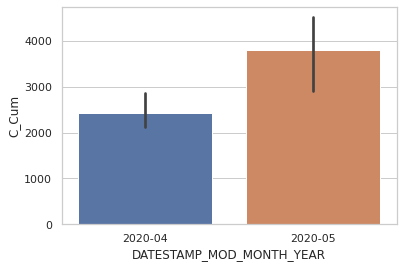

In [115]:
# visualizations using seasborn sns
# include xy values and where data will be pulled from
#this visualization shows cumlative count across counties 

vis1 = sns.barplot(x='DATESTAMP_MOD_MONTH_YEAR', y='C_Cum', data=finalDF_dropdups)

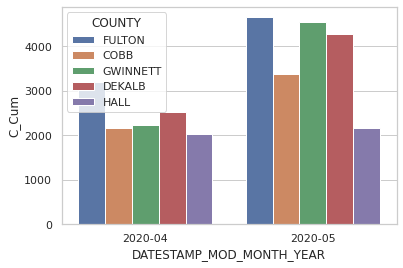

In [117]:
# use hue = to create to down by county
vis2 = sns.barplot(x='DATESTAMP_MOD_MONTH_YEAR', y='C_Cum', hue= "COUNTY", data=finalDF_dropdups)

In [123]:
#visualizations using plotly
# barmode= group

plotly1 = px.bar(finalDF_dropdups, x='DATETIME_STRING', y='C_Cum', color='COUNTY', barmode='group')
plotly1.show()

In [127]:
# barmode = stack, group, overlay, relative
plotly2 = px.bar(finalDF_dropdups, x='DATETIME_STRING', y='C_Cum', color='COUNTY', barmode='stack')
plotly2.show()

## Looking at total COVID cases by DAY

In [133]:
daily = finalDF
daily

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum
7464,FULTON,2020-04-01 03:59:59+00:00,2020-04-01,2020-04,2020-04,97,1499,22,460,10,109
7465,FULTON,2020-04-02 03:59:59+00:00,2020-04-02,2020-04,2020-04,50,1549,9,469,3,112
7466,FULTON,2020-04-03 03:59:59+00:00,2020-04-03,2020-04,2020-04,68,1617,17,486,10,122
7467,FULTON,2020-04-04 03:59:59+00:00,2020-04-04,2020-04,2020-04,38,1655,10,496,5,127
7468,FULTON,2020-04-05 03:59:59+00:00,2020-04-05,2020-04,2020-04,30,1685,12,508,1,128
...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05,2020-05,47,2069,8,305,1,63
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05,2020-05,26,2095,7,312,3,66
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05,2020-05,12,2107,4,316,0,66
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05,2020-05,35,2142,4,320,1,67


In [134]:
len(daily)

305

In [136]:
#looking at numbers of cases by day across the counties 
pd.pivot_table(daily, values='C_Cum', index='COUNTY',
               columns='DATESTAMP_MOD_DAY', aggfunc=np.sum)

DATESTAMP_MOD_DAY,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,...,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31
COUNTY,,,,,,,,,,,,,,,,,,,,,
COBB,867,893,921,935,956,999,1026,1073,1116,1160,...,3091,3131,3147,3178,3222,3259,3291,3333,3365,3386
DEKALB,937,987,1038,1069,1099,1159,1213,1252,1317,1371,...,3858,3891,3924,3959,4025,4098,4153,4209,4240,4271
FULTON,1499,1549,1617,1655,1685,1747,1824,1893,1952,2007,...,4276,4310,4336,4365,4437,4510,4558,4614,4637,4657
GWINNETT,614,657,702,734,766,811,858,905,952,1002,...,3781,3864,3928,3985,4101,4216,4304,4410,4503,4544
HALL,257,300,336,359,392,453,502,566,628,686,...,2579,2594,2603,2624,2634,2653,2668,2682,2707,2713


In [139]:
#swap index and columns values 
tempDF = pd.pivot_table(daily, values='C_Cum', index='DATESTAMP_MOD_DAY',
               columns='COUNTY', aggfunc=np.sum)

tempDF.head(50)

COUNTY,COBB,DEKALB,FULTON,GWINNETT,HALL
DATESTAMP_MOD_DAY,,,,,
2020-04-01,867,937,1499,614,257
2020-04-02,893,987,1549,657,300
2020-04-03,921,1038,1617,702,336
2020-04-04,935,1069,1655,734,359
2020-04-05,956,1099,1685,766,392
2020-04-06,999,1159,1747,811,453
2020-04-07,1026,1213,1824,858,502
2020-04-08,1073,1252,1893,905,566
2020-04-09,1116,1317,1952,952,628


In [148]:
# creating more filters
startdate = pd.to_datetime("2020-04-26").date()
enddate = pd.to_datetime("2020-05-09").date()

maskFilter = (daily['DATESTAMP_MOD_DAY'] >= startdate) & (daily['DATESTAMP_MOD_DAY'] <= enddate)
dailySpecific = daily.loc[maskFilter]
dailySpecific
#.loc means locate
# used to pull out columns/rows that are daily dataframe that abide by this filter

#gut check: if values are between the start and end date in the chart

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04,2020-04,36,2910,10,752,6,244
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04,2020-04,51,2961,8,760,4,248
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04,2020-04,77,3038,10,770,3,251
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04,2020-04,78,3116,17,787,8,259
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,73,3189,5,792,5,264
...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05,2020-05,47,2069,8,305,1,63
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05,2020-05,26,2095,7,312,3,66
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05,2020-05,12,2107,4,316,0,66
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05,2020-05,35,2142,4,320,1,67


In [149]:
#gut check to see if filter is working: check data for 1 county
dailySpecific[dailySpecific['COUNTY'] == 'FULTON']

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04,2020-04,36,2910,10,752,6,244
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04,2020-04,51,2961,8,760,4,248
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04,2020-04,77,3038,10,770,3,251
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04,2020-04,78,3116,17,787,8,259
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,73,3189,5,792,5,264
7494,FULTON,2020-05-01 03:59:59+00:00,2020-05-01,2020-05,2020-05,54,3243,15,807,4,268
7495,FULTON,2020-05-02 03:59:59+00:00,2020-05-02,2020-05,2020-05,29,3272,4,811,3,271
7496,FULTON,2020-05-03 03:59:59+00:00,2020-05-03,2020-05,2020-05,33,3305,8,819,6,277
7497,FULTON,2020-05-04 03:59:59+00:00,2020-05-04,2020-05,2020-05,47,3352,7,826,3,280
7498,FULTON,2020-05-05 03:59:59+00:00,2020-05-05,2020-05,2020-05,60,3412,5,831,1,281


## Visualization: Looking at total covid cases by day

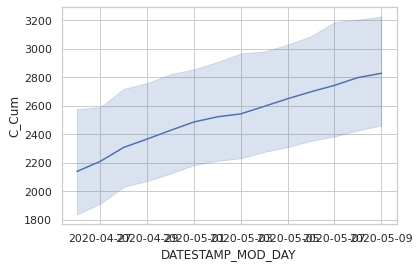

In [150]:
# using seaborn sns 

vis3 = sns.lineplot(data=dailySpecific, x='DATESTAMP_MOD_DAY', y="C_Cum")

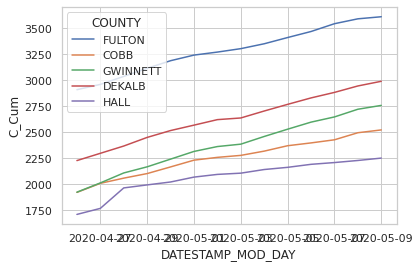

In [151]:
vis4 = sns.lineplot(data=dailySpecific, x='DATESTAMP_MOD_DAY', y="C_Cum", hue='COUNTY')

In [155]:
# plotly
# barmode = stack, group, overlay, relative
# plotly uses color, seaborn uses hue
plotly3 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='C_Cum', color='COUNTY', barmode='group')
plotly3.show()

In [156]:
# visualizations for hospitalizations 
plotly4 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='H_New', color='COUNTY', barmode='group')
plotly4.show()

In [157]:
plotly5 = px.bar(dailySpecific, x='DATESTAMP_MOD_DAY', y='H_Cum', color='COUNTY', barmode='group')
plotly5.show()

In [164]:
dailySpecific['newHospandDeathCovid'] = dailySpecific['D_New'].astype(int) + dailySpecific['H_New'].astype(int) + dailySpecific['C_New'].astype(int)
dailySpecific['newHospandDeathCovid']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



7489      52
7490      63
7491      90
7492     103
7493      83
        ... 
79995     56
79996     36
79997     16
79998     40
79999     24
Name: newHospandDeathCovid, Length: 70, dtype: int64

In [165]:
dailySpecific

,COUNTY,DATESTAMP_MOD,DATESTAMP_MOD_DAY,DATESTAMP_MOD_MONTH_YEAR,DATETIME_STRING,C_New,C_Cum,H_New,H_Cum,D_New,D_Cum,newHospandDeathCovid
7489,FULTON,2020-04-26 03:59:59+00:00,2020-04-26,2020-04,2020-04,36,2910,10,752,6,244,52
7490,FULTON,2020-04-27 03:59:59+00:00,2020-04-27,2020-04,2020-04,51,2961,8,760,4,248,63
7491,FULTON,2020-04-28 03:59:59+00:00,2020-04-28,2020-04,2020-04,77,3038,10,770,3,251,90
7492,FULTON,2020-04-29 03:59:59+00:00,2020-04-29,2020-04,2020-04,78,3116,17,787,8,259,103
7493,FULTON,2020-04-30 03:59:59+00:00,2020-04-30,2020-04,2020-04,73,3189,5,792,5,264,83
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,HALL,2020-05-01 03:59:59+00:00,2020-05-01,2020-05,2020-05,47,2069,8,305,1,63,56
79996,HALL,2020-05-02 03:59:59+00:00,2020-05-02,2020-05,2020-05,26,2095,7,312,3,66,36
79997,HALL,2020-05-03 03:59:59+00:00,2020-05-03,2020-05,2020-05,12,2107,4,316,0,66,16
79998,HALL,2020-05-04 03:59:59+00:00,2020-05-04,2020-05,2020-05,35,2142,4,320,1,67,40


In [175]:
plotly8 = px.bar(dailySpecific, 
                 x='DATESTAMP_MOD_DAY', 
                 y='newHospandDeathCovid', 
                 color='COUNTY', 
                 title="Gerogia 2019 COVID Data: Total New Hospitalizations, Deaths, COVID Cases by County",
                 labels={
                     "DATESTAMP_MOD_DAY": "Time (Month, Day, Year)",
                     "newHospandDeathCOVID": "COVID Count" },
                 barmode='group')


# to fix dates on x-axis to show years for each day
plotly8.update_layout(
    xaxis = dict(
        tickmode='linear',
        type='category',
    )
)


#display graph
plotly8.show()